<!-- Attributes
Field Name	Description
VendorID	A code indicating the TPEP provider that provided the record.
Creative Mobile Technologies
VeriFone Inc.
tpep_pickup_datetime	The date and time when the meter was engaged.
tpep_dropoff_datetime	The date and time when the meter was disengaged.
Passenger_count	The number of passengers in the vehicle. This is a driver-entered value.
Trip_distance	The elapsed trip distance in miles reported by the taximeter.
Pickup_longitude	Longitude where the meter was engaged.
Pickup_latitude	Latitude where the meter was engaged.
RateCodeID	The final rate code in effect at the end of the trip.
Standard rate
JFK
Newark
Nassau or Westchester
Negotiated fare
Group ride
Store_and_fwd_flag	This flag indicates whether the trip record was held in vehicle memory before sending to the vendor,
aka “store and forward,” because the vehicle did not have a connection to the server.
Y= store and forward trip
N= not a store and forward trip
Dropoff_longitude	Longitude where the meter was disengaged.
Dropoff_ latitude	Latitude where the meter was disengaged.
Payment_type	A numeric code signifying how the passenger paid for the trip.
Credit card
Cash
No charge
Dispute
Unknown
Voided trip
Fare_amount	The time-and-distance fare calculated by the meter.
Extra	Miscellaneous extras and surcharges. Currently, this only includes. the $0.50 and $1 rush hour and overnight charges.
MTA_tax	0.50 MTA tax that is automatically triggered based on the metered rate in use.
Improvement_surcharge	0.30 improvement surcharge assessed trips at the flag drop. the improvement surcharge began being levied in 2015.
Tip_amount	Tip amount – This field is automatically populated for credit card tips.Cash tips are not included.
Tolls_amount	Total amount of all tolls paid in trip.
Total_amount	The total amount charged to passengers. Does not include cash tips. -->

<!-- 
| Month   | Savings |
| ------- | ------- |
| January | $250 |
| February| $80 |
| March   | $420 |
 -->
 
<!--   **Attributes**

% | Field Name | Description |
% | :- | -: |
% | VendorID | A code indicating the TPEP provider that provided the record.
% | tpep_pickup_datetime | The date and time when the meter was engaged.
 -->

# Maximizing Revenue for Cab Drivers through Payment Type Analysis


## Problem Statement
### In today's cab booking sector, making the most of revenue is essential for long-term success and driver happiness. The goal of this project is to use data-driven insights to maximise revenue streams for cab drivers. This research aims to determine whether payment methods have an impact on fare pricing by focusing on the relationship between payment type and fare amount.

## Objective
### Here, hypothesis testing and descriptive statistics are used to extract useful information that can help cab drivers generate more revenue. In particular, we want to find out if there is a big difference in the fares for those who pay with cards versus those who pay with cash.


In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import warnings 
warnings.filterwarnings('ignore')



In [2]:
# Loading data
df = pd.read_csv('/kaggle/input/dataset/NYC_yellow_taxi_data_2020.csv')
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-03-01 00:31:13,2020-03-01 01:01:42,1.0,4.70,1.0,N,88,255,1.0,22.0,3.0,0.5,2.00,0.0,0.3,27.80,2.5
1,2.0,2020-03-01 00:08:22,2020-03-01 00:08:49,1.0,0.00,1.0,N,193,193,2.0,2.5,0.5,0.5,0.00,0.0,0.3,3.80,0.0
2,1.0,2020-03-01 00:52:18,2020-03-01 00:59:16,1.0,1.10,1.0,N,246,90,1.0,6.0,3.0,0.5,1.95,0.0,0.3,11.75,2.5
3,2.0,2020-03-01 00:47:53,2020-03-01 00:50:57,2.0,0.87,1.0,N,151,238,1.0,5.0,0.5,0.5,1.76,0.0,0.3,10.56,2.5
4,1.0,2020-03-01 00:43:19,2020-03-01 00:58:27,0.0,4.40,1.0,N,79,261,1.0,16.5,3.0,0.5,4.05,0.0,0.3,24.35,2.5


In [3]:
df.shape

(3007292, 18)

## Dataset Description

| Field Name              | Description                                                                                                    |
|-------------------------|----------------------------------------------------------------------------------------------------------------|
| VendorID                | A code indicating the TPEP provider that provided the record.                                                  |
|                         | 1. Creative Mobile Technologies                                                                               |
|                         | 2. VeriFone Inc.                                                                                              |
| tpep_pickup_datetime    | The date and time when the meter was engaged.                                                                  |
| tpep_dropoff_datetime   | The date and time when the meter was disengaged.                                                               |
| passenger_count         | The number of passengers in the vehicle. This is a driver-entered value.                                       |
| trip_distance           | The elapsed trip distance in miles reported by the taximeter.                                                  |
| RateCodeID              | The final rate code in effect at the end of the trip.                                                          |
|                         | 1. Standard rate                                                                                               |
|                         | 2. JFK                                                                                                         |
|                         | 3. Newark                                                                                                      |
|                         | 4. Nassau or Westchester                                                                                       |
|                         | 5. Negotiated fare                                                                                             |
|                         | 6. Group ride                                                                                                  |
| Store_and_fwd_flag      | This flag indicates whether the trip record was held in vehicle memory before sending to the vendor          |
|                         | aka 'store and forward' because the vehicle did not have a connection to the server.                           |
|                         | 1. Y = store and forward trip                                                                                  |
|                         | 2. N = not a store and forward trip                                                                            |
| PULocationID            | TLC Taxi Zone in which the taximeter was engaged.                                                              |
| DOLocationID            | TLC Taxi Zone in which the taximeter was disengaged.                                                           |
| payment_type            | A numeric code signifying how the passenger paid for the trip.                                                 |
|                         | 1. Credit card                                                                                                 |
|                         | 2. Cash                                                                                                        |
|                         | 3. No charge                                                                                                   |
|                         | 4. Dispute                                                                                                     |
|                         | 5. Unknown                                                                                                     |
|                         | 6. Voided trip                                                                                                |
| fare_amount             | The time-and-distance fare calculated by the meter.                                                            |
| extra                   | Miscellaneous extras and surcharges. Currently, this only includes the $0.50  and  $1 rush hour and overnight charges. |
| mta_tax                 | $0.50 MTA tax that is automatically triggered based on the metered rate in use.                                |
| tip_amount              | Tip amount - This field is automatically populated for credit card tips. Cash tips are not included.           |
| tolls_amount            | Total amount of all tolls paid in trip.                                                                        |
| improvement_surcharge   | Improvement surcharge                                                                                          |
| total_amount            | The total amount charged to passengers. Does not include cash tips.                                            |


## Exploratory Data Analysis
### A common observation for any cab service is that fare price depends on the distance travelled and total duration of the trip. Finding out the factors that affect the fare price:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3007292 entries, 0 to 3007291
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               float64
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           float64
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(13), int64(2), object(3)
memory usage: 413.0+ MB


In [5]:
# Ccnverting object datatype to datetime datatype 
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])


In [6]:
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df['duration'] = df['duration'].dt.total_seconds()/60

In [7]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-03-01 00:31:13,2020-03-01 01:01:42,1.0,4.70,1.0,N,88,255,1.0,22.0,3.0,0.5,2.00,0.0,0.3,27.80,2.5,30.483333
1,2.0,2020-03-01 00:08:22,2020-03-01 00:08:49,1.0,0.00,1.0,N,193,193,2.0,2.5,0.5,0.5,0.00,0.0,0.3,3.80,0.0,0.450000
2,1.0,2020-03-01 00:52:18,2020-03-01 00:59:16,1.0,1.10,1.0,N,246,90,1.0,6.0,3.0,0.5,1.95,0.0,0.3,11.75,2.5,6.966667
3,2.0,2020-03-01 00:47:53,2020-03-01 00:50:57,2.0,0.87,1.0,N,151,238,1.0,5.0,0.5,0.5,1.76,0.0,0.3,10.56,2.5,3.066667
4,1.0,2020-03-01 00:43:19,2020-03-01 00:58:27,0.0,4.40,1.0,N,79,261,1.0,16.5,3.0,0.5,4.05,0.0,0.3,24.35,2.5,15.133333


### Checking the distribution of different features: 

In [8]:
df['VendorID'].value_counts()

VendorID
2.0    1981578
1.0     988227
Name: count, dtype: int64

In [9]:
df['RatecodeID'].value_counts()

RatecodeID
1.0     2886773
2.0       58968
5.0       15847
3.0        5854
4.0        2228
99.0        120
6.0          15
Name: count, dtype: int64

In [10]:
df['passenger_count'].value_counts()

passenger_count
1.0    2187343
2.0     407509
3.0     106517
5.0      96974
0.0      63431
6.0      59573
4.0      48434
7.0         10
9.0          9
8.0          5
Name: count, dtype: int64

In [11]:
df['store_and_fwd_flag'].value_counts()

store_and_fwd_flag
N    2941828
Y      27977
Name: count, dtype: int64

In [12]:
df['payment_type'].value_counts()

payment_type
1.0    2211029
2.0     732070
3.0      17044
4.0       9662
Name: count, dtype: int64

In [13]:
df['improvement_surcharge'].value_counts()

improvement_surcharge
 0.3    2994167
-0.3      11027
 0.0       2098
Name: count, dtype: int64

In [14]:
df['congestion_surcharge'].value_counts()

congestion_surcharge
 2.50    2705095
 0.00     293583
-2.50       8587
 0.75         25
-0.75          1
 1.00          1
Name: count, dtype: int64

## Feature Selection for further analysis
### After observing the distribution of various features as above, it can be concluded that the following features are distributed widespread and fare_amount is affected mostly by them:
* VendorID
* passenger_count
* trip_distance
* payment_type
* duration

In [15]:
df = df[['VendorID', 'passenger_count', 'trip_distance', 'payment_type', 'duration', 'fare_amount']]

In [16]:
df

,VendorID,passenger_count,trip_distance,payment_type,duration,fare_amount
0,1.0,1.0,4.70,1.0,30.483333,22.00
1,2.0,1.0,0.00,2.0,0.450000,2.50
2,1.0,1.0,1.10,1.0,6.966667,6.00
3,2.0,2.0,0.87,1.0,3.066667,5.00
4,1.0,0.0,4.40,1.0,15.133333,16.50
...,...,...,...,...,...,...
3007287,NaN,NaN,5.43,NaN,12.000000,30.47
3007288,NaN,NaN,13.21,NaN,29.000000,37.97
3007289,NaN,NaN,12.14,NaN,21.850000,37.10
3007290,NaN,NaN,7.01,NaN,13.466667,20.07


In [17]:
# Finding missing values
df.isnull().sum()

VendorID           37487
passenger_count    37487
trip_distance          0
payment_type       37487
duration               0
fare_amount            0
dtype: int64

### Let's check what portion of these missing values contribute to actual data


In [18]:
cal = (df.isnull().sum()/len(df))*100
cal

VendorID           1.246537
passenger_count    1.246537
trip_distance      0.000000
payment_type       1.246537
duration           0.000000
fare_amount        0.000000
dtype: float64

### As the portion of missing values are quite negligible (~1.25 %), we can safely remove/drop those rows. Otherwise we could have filled those missing values with the mean or median.

In [19]:
df.dropna(inplace = True)

In [20]:
df

,VendorID,passenger_count,trip_distance,payment_type,duration,fare_amount
0,1.0,1.0,4.70,1.0,30.483333,22.0
1,2.0,1.0,0.00,2.0,0.450000,2.5
2,1.0,1.0,1.10,1.0,6.966667,6.0
3,2.0,2.0,0.87,1.0,3.066667,5.0
4,1.0,0.0,4.40,1.0,15.133333,16.5
...,...,...,...,...,...,...
2969800,2.0,5.0,0.52,2.0,2.833333,4.0
2969801,2.0,5.0,2.35,1.0,10.983333,10.5
2969802,2.0,5.0,1.33,1.0,7.100000,7.0
2969803,2.0,6.0,0.87,1.0,3.333333,5.0


### The payment_type can be either 1, 2, 3 or 4 and passenger_count can only take integral values, so the datatype of these columns are changed accordingly.  

In [21]:
df['payment_type'] = df['payment_type'].astype('int')
df['passenger_count'] = df['passenger_count'].astype('int')

In [22]:
df

,VendorID,passenger_count,trip_distance,payment_type,duration,fare_amount
0,1.0,1,4.70,1,30.483333,22.0
1,2.0,1,0.00,2,0.450000,2.5
2,1.0,1,1.10,1,6.966667,6.0
3,2.0,2,0.87,1,3.066667,5.0
4,1.0,0,4.40,1,15.133333,16.5
...,...,...,...,...,...,...
2969800,2.0,5,0.52,2,2.833333,4.0
2969801,2.0,5,2.35,1,10.983333,10.5
2969802,2.0,5,1.33,1,7.100000,7.0
2969803,2.0,6,0.87,1,3.333333,5.0


In [23]:
check = df.duplicated()
check.value_counts()

False    1752571
True     1217234
Name: count, dtype: int64

In [24]:
# Removing duplicate values as they don't add any value to the analysis

df.drop_duplicates(inplace = True)

In [25]:
df

,VendorID,passenger_count,trip_distance,payment_type,duration,fare_amount
0,1.0,1,4.70,1,30.483333,22.0
1,2.0,1,0.00,2,0.450000,2.5
2,1.0,1,1.10,1,6.966667,6.0
3,2.0,2,0.87,1,3.066667,5.0
4,1.0,0,4.40,1,15.133333,16.5
...,...,...,...,...,...,...
2969799,2.0,5,5.11,2,9.200000,15.5
2969800,2.0,5,0.52,2,2.833333,4.0
2969801,2.0,5,2.35,1,10.983333,10.5
2969802,2.0,5,1.33,1,7.100000,7.0


In [26]:
df = df[df['payment_type'] < 3]
df = df[(df['passenger_count'] > 0) & (df['passenger_count'] < 6)]

## These removal are done because: 
# 1. We want to compare card and cash payments only for payment_type.
# 2. The passenger_count 0 and greater than 5 are very rare (and 0 is completely absurd).

In [27]:
df

,VendorID,passenger_count,trip_distance,payment_type,duration,fare_amount
0,1.0,1,4.70,1,30.483333,22.0
1,2.0,1,0.00,2,0.450000,2.5
2,1.0,1,1.10,1,6.966667,6.0
3,2.0,2,0.87,1,3.066667,5.0
5,1.0,1,3.50,1,18.566667,15.0
...,...,...,...,...,...,...
2969798,2.0,1,2.98,2,8.700000,10.5
2969799,2.0,5,5.11,2,9.200000,15.5
2969800,2.0,5,0.52,2,2.833333,4.0
2969801,2.0,5,2.35,1,10.983333,10.5


In [28]:
df['payment_type'].replace([1, 2], ['Card', 'Cash'], inplace = True)

In [29]:
df

,VendorID,passenger_count,trip_distance,payment_type,duration,fare_amount
0,1.0,1,4.70,Card,30.483333,22.0
1,2.0,1,0.00,Cash,0.450000,2.5
2,1.0,1,1.10,Card,6.966667,6.0
3,2.0,2,0.87,Card,3.066667,5.0
5,1.0,1,3.50,Card,18.566667,15.0
...,...,...,...,...,...,...
2969798,2.0,1,2.98,Cash,8.700000,10.5
2969799,2.0,5,5.11,Cash,9.200000,15.5
2969800,2.0,5,0.52,Cash,2.833333,4.0
2969801,2.0,5,2.35,Card,10.983333,10.5


In [30]:
df.describe()

,VendorID,passenger_count,trip_distance,duration,fare_amount
count,1.629286e+06,1.629286e+06,1.629286e+06,1.629286e+06,1.629286e+06
mean,1.774587e+00,1.611257e+00,3.922470e+00,2.092307e+01,1.585992e+01
std,4.178540e-01,1.087376e+00,4.382070e+00,8.714135e+01,1.339900e+01
min,1.000000e+00,1.000000e+00,0.000000e+00,-4.746262e+04,-3.575000e+02
25%,2.000000e+00,1.000000e+00,1.370000e+00,8.716667e+00,8.000000e+00
50%,2.000000e+00,1.000000e+00,2.410000e+00,1.410000e+01,1.200000e+01
75%,2.000000e+00,2.000000e+00,4.520000e+00,2.130000e+01,1.850000e+01
max,2.000000e+00,5.000000e+00,3.109000e+02,1.814817e+03,1.259000e+03


### Here, it can be observed that some observations have negative duration, negative fare_amount, and zero trip_distance which are all unpractical. Thus, removing these rows. 

In [31]:
df = df[df['trip_distance'] > 0]
df = df[df['duration'] > 0]
df = df[df['fare_amount'] > 0]

In [32]:
df

,VendorID,passenger_count,trip_distance,payment_type,duration,fare_amount
0,1.0,1,4.70,Card,30.483333,22.0
2,1.0,1,1.10,Card,6.966667,6.0
3,2.0,2,0.87,Card,3.066667,5.0
5,1.0,1,3.50,Card,18.566667,15.0
6,1.0,1,14.10,Card,31.250000,40.5
...,...,...,...,...,...,...
2969798,2.0,1,2.98,Cash,8.700000,10.5
2969799,2.0,5,5.11,Cash,9.200000,15.5
2969800,2.0,5,0.52,Cash,2.833333,4.0
2969801,2.0,5,2.35,Card,10.983333,10.5


In [33]:
df.describe()

,VendorID,passenger_count,trip_distance,duration,fare_amount
count,1.611153e+06,1.611153e+06,1.611153e+06,1.611153e+06,1.611153e+06
mean,1.778337e+00,1.614928e+00,3.960938e+00,2.098690e+01,1.574365e+01
std,4.153656e-01,1.090003e+00,4.383951e+00,7.904047e+01,1.283636e+01
min,1.000000e+00,1.000000e+00,1.000000e-02,1.666667e-02,1.000000e-02
25%,2.000000e+00,1.000000e+00,1.400000e+00,8.783333e+00,8.000000e+00
50%,2.000000e+00,1.000000e+00,2.440000e+00,1.411667e+01,1.200000e+01
75%,2.000000e+00,2.000000e+00,4.580000e+00,2.128333e+01,1.850000e+01
max,2.000000e+00,5.000000e+00,3.109000e+02,1.814817e+03,1.259000e+03


### Here, it can be observed that 75 percentile and maximum values differ by a great margin, indicating presence of outliers. They can be graphically shown as below:

(array([1.610318e+06, 7.390000e+02, 7.200000e+01, 1.700000e+01,
        4.000000e+00, 1.000000e+00, 1.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([1.000000e-02, 1.259090e+02, 2.518080e+02, 3.777070e+02,
        5.036060e+02, 6.295050e+02, 7.554040e+02, 8.813030e+02,
        1.007202e+03, 1.133101e+03, 1.259000e+03]),
 <BarContainer object of 10 artists>)

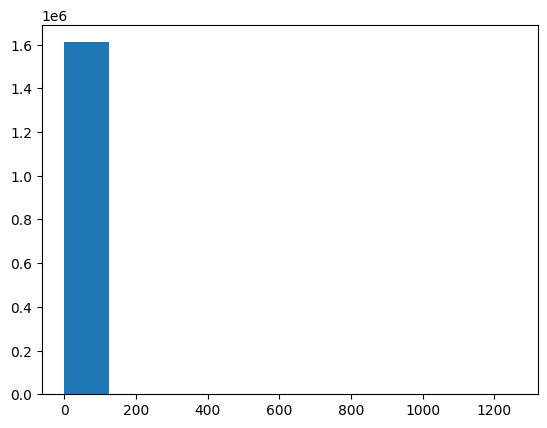

In [34]:
plt.hist(df['fare_amount'])

<Axes: >

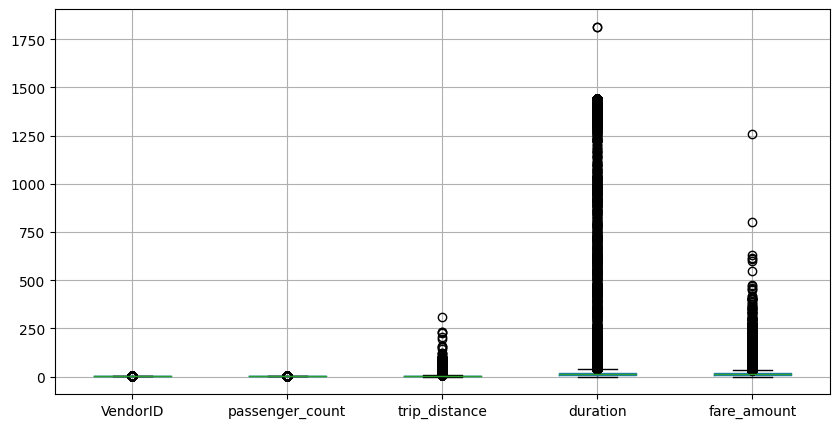

In [35]:
df.boxplot(figsize = (10, 5))

{'whiskers': [<matplotlib.lines.Line2D at 0x7a26004de770>,
 'caps': [<matplotlib.lines.Line2D at 0x7a26004deb90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a26004de4d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7a26004df0d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a26004df370>],
 'means': []}

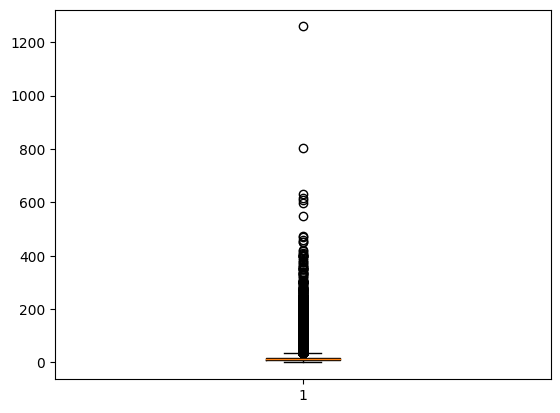

In [36]:
plt.boxplot(df['fare_amount'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7a261bf58f40>,
 'caps': [<matplotlib.lines.Line2D at 0x7a261bf5a5f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a261bf59f30>],
 'medians': [<matplotlib.lines.Line2D at 0x7a261bf5ab30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a261bf5add0>],
 'means': []}

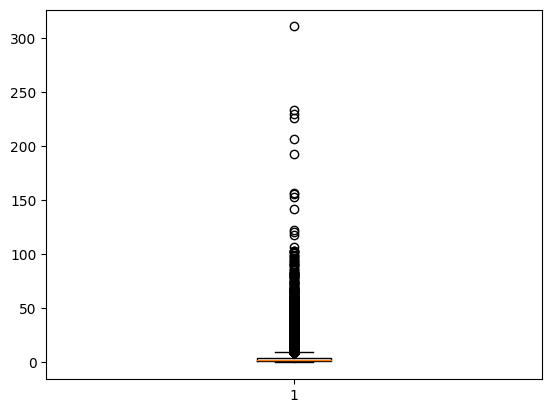

In [37]:
plt.boxplot(df['trip_distance'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7a261bf5bbe0>,
 'caps': [<matplotlib.lines.Line2D at 0x7a261bfc1a20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a261bfc1360>],
 'medians': [<matplotlib.lines.Line2D at 0x7a261bfc1f60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a261bfc2200>],
 'means': []}

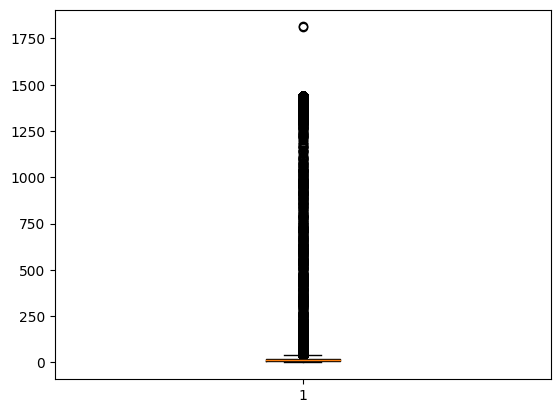

In [38]:
plt.boxplot(df['duration'])

### It can be observed that there is a huge number of outliers, needed to be removed. Thus, outliers are removed using Interquartile range.

In [39]:
for col in ['trip_distance', 'duration', 'fare_amount']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1
    
    lower_bound = q1 - 1.5*(IQR)
    upper_bound = q3 + 1.5*(IQR)
    
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [40]:
df

,VendorID,passenger_count,trip_distance,payment_type,duration,fare_amount
0,1.0,1,4.70,Card,30.483333,22.0
2,1.0,1,1.10,Card,6.966667,6.0
3,2.0,2,0.87,Card,3.066667,5.0
5,1.0,1,3.50,Card,18.566667,15.0
7,1.0,1,1.00,Card,8.700000,7.0
...,...,...,...,...,...,...
2969798,2.0,1,2.98,Cash,8.700000,10.5
2969799,2.0,5,5.11,Cash,9.200000,15.5
2969800,2.0,5,0.52,Cash,2.833333,4.0
2969801,2.0,5,2.35,Card,10.983333,10.5


<Axes: >

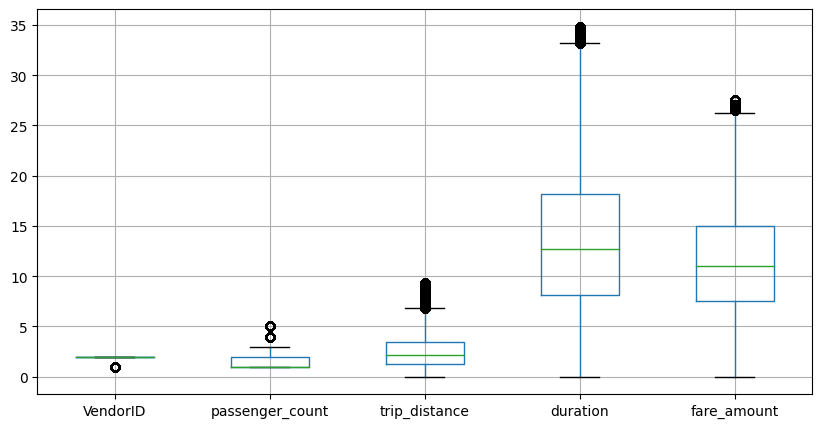

In [41]:
df.boxplot(figsize = (10, 5))

### Here, the relationship between payment type and passenger behavior concerning trip distance and fare amount are to be explored. 
### So, to investigate this, histograms are plotted to visualize the distribution of passenger counts paying with either card or cash. This will also provide stakeholders with insights into fare amount ranges associated with different payment methods.

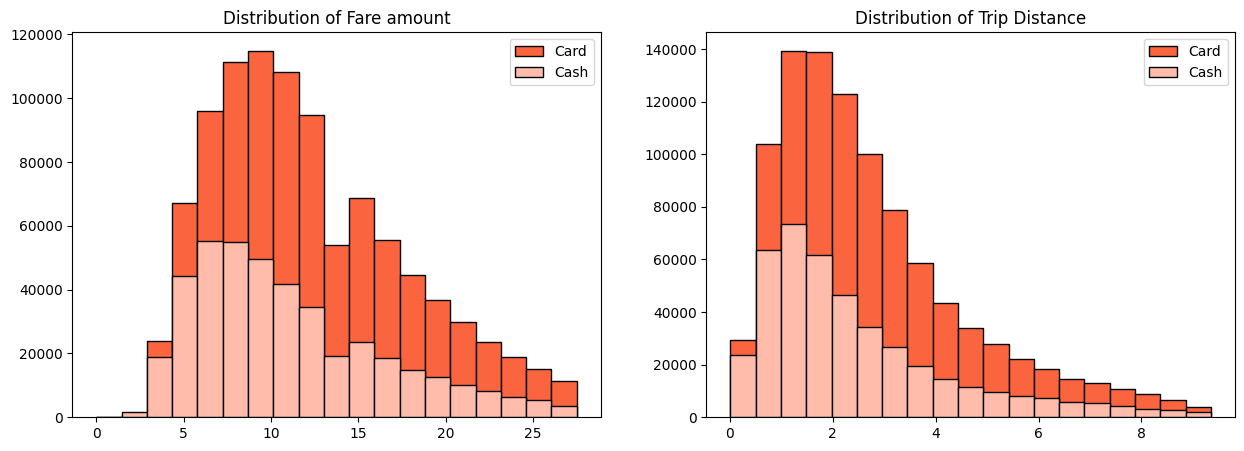

In [42]:
min1 = df['fare_amount'].min()
max1 = df['fare_amount'].max()
bins = np.linspace(min1, max1, 20)
plt.figure(figsize = (15 ,5))
plt.subplot(1, 2, 1)
plt.title('Distribution of Fare amount')
plt.hist(df[df['payment_type'] == 'Card']['fare_amount'], bins = bins, edgecolor = 'k', color = '#FA643F', label = 'Card')
plt.hist(df[df['payment_type'] == 'Cash']['fare_amount'], bins = bins, edgecolor = 'k', color = '#FFBCAB', label = 'Cash')
plt.legend()

min2 = df['trip_distance'].min()
max2 = df['trip_distance'].max()
bins = np.linspace(min2, max2, 20)
plt.subplot(1, 2, 2)
plt.title('Distribution of Trip Distance')
plt.hist(df[df['payment_type'] == 'Card']['trip_distance'], bins = bins, edgecolor = 'k', color = '#FA643F', label = 'Card')
plt.hist(df[df['payment_type'] == 'Cash']['trip_distance'], bins = bins, edgecolor = 'k', color = '#FFBCAB', label = 'Cash')
plt.legend()
plt.show()

In [43]:
df.groupby('payment_type').agg({'fare_amount': ['mean', 'std',], 'trip_distance': ['mean', 'std'],})

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
Card           12.218503  5.457071      2.737389  1.837525
Cash           11.035230  5.427591      2.441233  1.857156

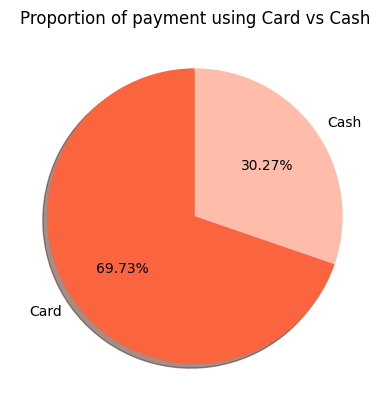

In [44]:
plt.title('Proportion of payment using Card vs Cash')
plt.pie(df['payment_type'].value_counts(normalize=True), labels = df['payment_type'].value_counts().index, startangle = 90, autopct = '%1.2f%%', shadow = True, colors = {'#FA643F', '#FFBCAB'})
plt.show()

In [45]:
df1 = (df.groupby(['payment_type', 'passenger_count'])[['passenger_count']].count()/df.shape[0])*100
df1

passenger_count
payment_type passenger_count                 
Card         1                      45.150903
             2                      13.637209
             3                       4.504796
             4                       2.086181
             5                       4.351519
Cash         1                      20.447305
             2                       5.701556
             3                       1.724937
             4                       0.902718
             5                       1.492877

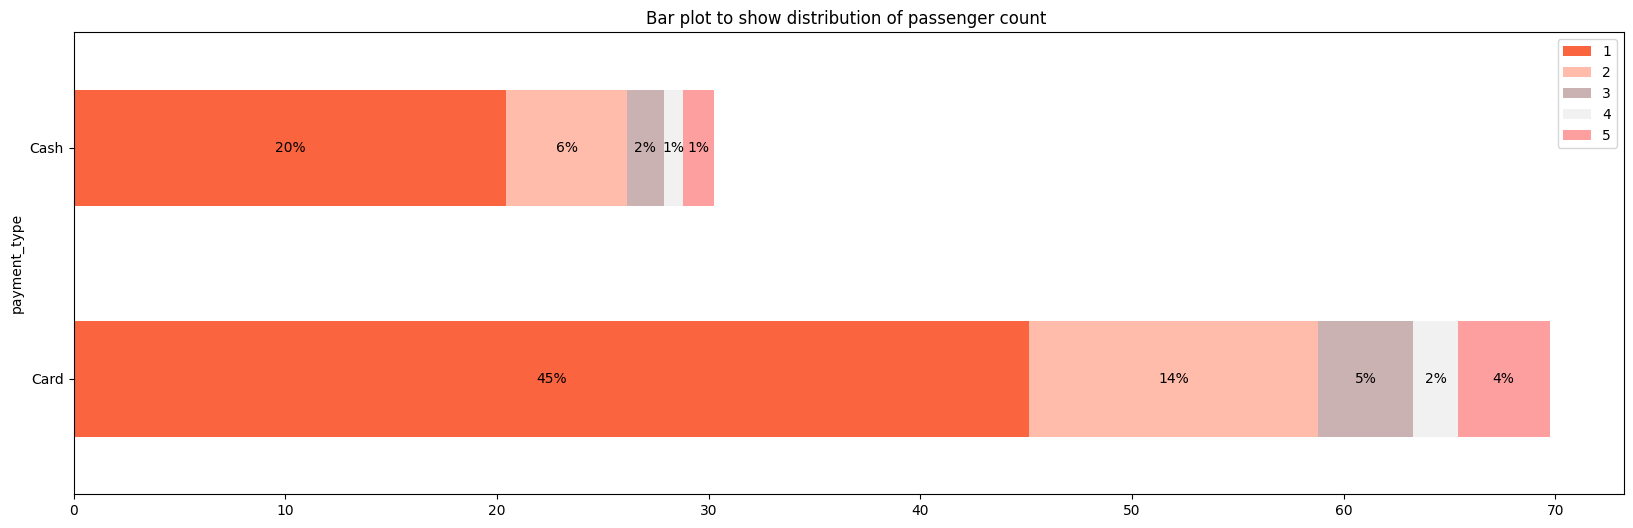

In [46]:
df2 = pd.DataFrame(columns = ['payment_type',1,2,3,4,5])
df2['payment_type'] = ['Card','Cash']
df2.iloc[0,1:] = df1.iloc[:5,-1]
df2.iloc[1,1:] = df1.iloc[5:,-1]

fig, ax = plt.subplots(figsize=(20, 6))
df2.plot(x='payment_type', kind='barh', stacked = True, title='Bar plot to show distribution of passenger count ', ax=ax, color = ['#FA643F', '#FFBCAB', '#CBB2B2', '#F1F1F1', '#FD9F9F'])

# # Add percentage text
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2,
            y + height / 2,
            '{:.0f}%'.format(width),
            horizontalalignment='center',
            verticalalignment='center')

## Hypothesis Testing

### In order to select the most suitable test for our scenario, our initial step involves evaluating whether the distribution of fare amounts adheres to a normal distribution. While the histogram depicted above suggests otherwise, we will further confirm this by generating a QQ plot.

### Quantile-quantile (QQ) plots can be used to assess whether the fare amount distributions for each payment type are approximately normally distributed. If the data points closely align with the diagonal line in the plot, it suggests that the data follows a normal distribution.

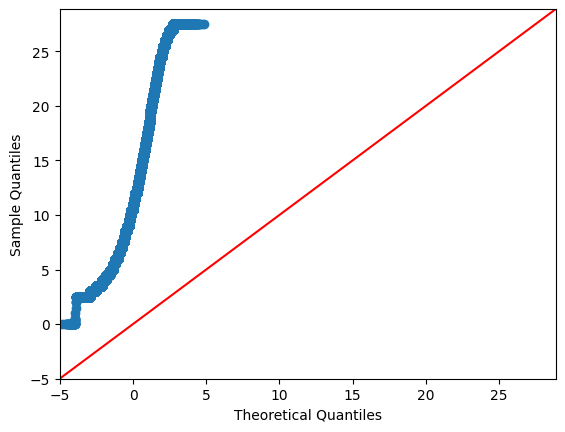

In [47]:
#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(df['fare_amount'], line='45')
plt.show()

### The data values clearly do not follow the red 45-degree line, which is an indication that they do not follow a normal distribution. So, z test will not be good for this. That's why T test is the most suitable test for this purpose.

### Given that the T-test does not require the population standard deviation, it is a more universally applicable approach for hypothesis testing.


### In the analysis of NYC Yellow Taxi Trip Records, where the population standard deviation is unknown, the T-test offers a more appropriate and flexible method for comparing means between two groups (e.g., fare amounts by payment type). It provides a reliable way to infer about the population, accommodating the uncertainty that comes with estimating population parameters from sample data.

#### **Null hypothesis**:  There is no difference in average fare between customers who use credit cards and customers who use cash. 

#### **Alternative hypothesis**: There is a difference in average fare between customers who use credit cards and customers who use cash


In [48]:
# sample 1
credit_card = df[df['payment_type'] == 'Card']['fare_amount']

# sample 2
cash = df[df['payment_type'] == 'Cash']['fare_amount']

# performing t test on both the different sample
t_stat, p_value = stats.ttest_ind(a=credit_card, b=cash, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# comparing the p value with the significance of 5% or 0.05
if p_value < 0.05:
    print("\nReject the null hypothesis")
else:
    print("\nAccept the null hypothesis")

T-statistic: 118.2634945602403, P-value: 0.0

Reject the null hypothesis


### Since the p-value is significantly smaller than the significance level of 5%, we will reject the null hypothesis.

### It can be concluded that there is a statistically significant difference in the average fare amount between customers who use credit cards and customers who use cash.

### The key business insight is that encouraging customers to pay with credit cards can generate more revenue for cab drivers.